# GipsyX processor
### 1. Conversion, analysis and merging  of rinex files into 30 h arc files
### 2. TropNominals generation with VMF1 model
### 3. IONEX merging
### 4. Tree files generation (for each year and IONEX file)

In [1]:
from gxlib import gx_aux,gx_convert, gx_merge, gx_trees, gx_compute, gx_tdps


class rnx2dr:
    def __init__(self,
                 project_name,
                 stations_list,
                 years_list,
                 tree_options,
                 rnx_dir='/mnt/Data/bogdanm/GNSS_data/BIGF_data/daily30s',
                 tmp_dir='/mnt/Data/bogdanm/tmp_GipsyX',
                 VMF1_dir = '/mnt/Data/bogdanm/Products/VMF1_Products',
                 tropNom_type = '30h_tropNominalOut_VMF1.tdp',
                 IGS_logs_dir = '/mnt/Data/bogdanm/GNSS_data/BIGF_data/station_log_files',
                 rate = 300,
                 gnss_products_dir = '/mnt/Data/bogdanm/Products/JPL_GPS_Products_IGb08/Final',
                 ionex_type='igs', #No ionex dir required as ionex merged products will be put into tmp directory by ionex class
                 num_cores = 8):
        
        self.project_name = project_name
        self.IGS_logs_dir = IGS_logs_dir
        self.rnx_dir=rnx_dir
        self.tmp_dir=tmp_dir
        self.stations_list=stations_list
        self.years_list=years_list
        self.num_cores = num_cores
        self.VMF1_dir = VMF1_dir
        self.tropNom_type = tropNom_type
        self.tree_options = tree_options
        self.rnx_files = gx_convert.select_rnx(rnx_dir=self.rnx_dir,stations_list=self.stations_list,years_list=self.years_list)
        self.rnx_files_in_out = gx_convert.rnx2dr_gen_paths(rnx_files=self.rnx_files,stations_list=self.stations_list,tmp_dir=self.tmp_dir)
        self.staDb_path= gx_aux.gen_staDb(self.tmp_dir,self.project_name,self.stations_list,self.IGS_logs_dir)
        self.gnss_products_dir = gnss_products_dir
        self.ionex_type=ionex_type
        self.rate=rate
        
    def analyse(self):
        return gx_aux.analyse(rnx_files=self.rnx_files,stations_list=self.stations_list,years_list=self.years_list)
    def rnx2dr(self):
        gx_convert.rnx2dr(rnx_files=self.rnx_files, stations_list=self.stations_list, tmp_dir=self.tmp_dir, num_cores=self.num_cores)

    def get_drInfo(self):
        gx_aux.get_drinfo(num_cores=self.num_cores,rnx_files_in_out=self.rnx_files_in_out,stations_list=self.stations_list,tmp_dir=self.tmp_dir,years_list=self.years_list)
    
    def dr_merge(self):
        merge_table = gx_merge.get_merge_table(tmp_dir=self.tmp_dir)
        gx_merge.dr_merge(merge_table=merge_table,num_cores=self.num_cores,stations_list=self.stations_list)
    def gen_VMF1_tropNom(self):
        gx_tdps.gen_tropnom(tmp_dir=self.tmp_dir,VMF1_dir=self.VMF1_dir,num_cores=self.num_cores,rate=self.rate,staDb_path=self.staDb_path)
    def gen_trees(self):
        return gx_trees.gen_trees(ionex_type=self.ionex_type,tmp_dir=self.tmp_dir,tree_options=self.tree_options)
    def gd2e(self):
        merge_table = gx_merge.get_merge_table(tmp_dir=self.tmp_dir)
        return gx_compute.gd2e(gnss_products_dir=self.gnss_products_dir,
                merge_tables=merge_table,
                num_cores=self.num_cores,
                project_name=self.project_name,
                staDb_path=self.staDb_path,
                stations_list=self.stations_list,
                tmp_dir=self.tmp_dir,
                trees_df=self.gen_trees(),
                tropNom_type=self.tropNom_type,
                years_list=self.years_list)
            



In [2]:
from trees_options import *

In [11]:
'''CAMB test dataset 2003-2007 processing for noise analysis etc'''
stations_list=['CAMB',]
# years_list=[2003,]
years_list=[2003,2004,2005,2006,2007]
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10Em5',num_cores=16,tree_options=all_on_kinematic_057_10Em5)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [12]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10Em4',num_cores=16,tree_options=all_on_kinematic_057_10Em4)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [13]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10Em3',num_cores=16,tree_options=all_on_kinematic_057_10Em3)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [14]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10Em2',num_cores=16,tree_options=all_on_kinematic_057_10Em2)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [15]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10Em1',num_cores=16,tree_options=all_on_kinematic_057_10Em1)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [16]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10E0',num_cores=16,tree_options=all_on_kinematic_057_10E0)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [17]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10E1',num_cores=16,tree_options=all_on_kinematic_057_10E1)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [18]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10E2',num_cores=16,tree_options=all_on_kinematic_057_10E2)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [8]:
day_3_set = camb_aux.gd2e()[0][2]
day_3_set


Staion CAMB processing starts...
Number of files to be processed: 325 
Adjusted number of cores: 20


(2, '/mnt/Data/bogdanm/tmp_GipsyX/rnx_dr/CAMB/2003/003/camb0030.03d.Z_30h.dr.gz', 3, 2003, '003', '/mnt/Data/bogdanm/tmp_GipsyX/Trees/igs2003/', '/mnt/Data/bogdanm/tmp_GipsyX/tropNom/2003/003/30h_tropNominalOut_VMF1.tdp', '/mnt/Data/bogdanm/tmp_GipsyX/gd2e/camb_2003-2007_kinematic/CAMB/2003/003', '/mnt/Data/bogdanm/Products/JPL_GPS_Products_IGb08/Final', '/mnt/Data/bogdanm/tmp_GipsyX/staDb/camb_2003-2007_kinematic/camb_2003-2007_kinematic.staDb', 'CAMB', 0)

In [19]:
import numpy as _np
import pandas as _pd
from gxlib import gx_compute
import matplotlib.pyplot as plt

In [9]:

gx_compute._gd2e(gd2e_set=day_3_set)

2003/003


In [11]:
npz_path = '/mnt/Data/bogdanm/tmp_GipsyX/gd2e/camb_2003-2007_kinematic/CAMB/2003/003/gipsyx_out.npz'
npz_file = _np.load(npz_path)
npz_file['finalResiduals']

array([[94813500, '{GPS51(1)-CAMB(1)}', 'IonoFreeL_1P_2P', ..., 81.5473,
        47.5127, nan],
       [94813500, '{GPS51(1)-CAMB(1)}', 'IonoFreeC_1P_2P', ..., 81.5473,
        47.5127, nan],
       [94813500, '{GPS46(1)-CAMB(1)}', 'IonoFreeL_1P_2P', ..., 88.5668,
        204.61599999999999, nan],
       ...,
       [94920900, '{GPS24(1)-CAMB(1)}', 'IonoFreeC_1P_2P', ..., 81.0961,
        185.942, nan],
       [94920900, '{GPS13(1)-CAMB(1)}', 'IonoFreeL_1P_2P', ..., 76.6723,
        200.72400000000002, nan],
       [94920900, '{GPS13(1)-CAMB(1)}', 'IonoFreeC_1P_2P', ..., 76.6723,
        200.72400000000002, nan]], dtype=object)

In [16]:
def RMS_res(residuals):
    '''Expects np array from finalResiduals.out with no header. Returns RMS of IonoFreeL_1P_2P [included] (Carrier phase residulas rms)'''
    residuals_header = ['Time','T/R Antenna No','DataType','PF Residual (m)','Elevation from receiver (deg)',\
                    ' Azimuth from receiver (deg)','Elevation from transmitter (deg)',' Azimuth from transmitter (deg)','Status']
    residuals_df = _pd.DataFrame(data = residuals,columns=residuals_header).set_index(['DataType','Time'])
    L_residuals = residuals_df[residuals_df['Status'].isna()].loc['IonoFreeL_1P_2P']['PF Residual (m)']
    RMS = (((L_residuals**2).sum())/L_residuals.count())**0.5
    return L_residuals

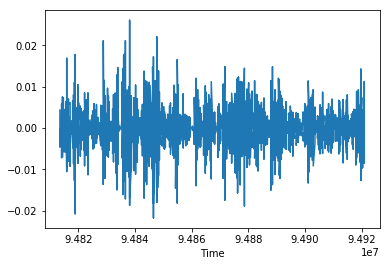

In [21]:
RMS_res(npz_file['finalResiduals']).plot()
plt.show()

In [25]:
debug_tree_file = '/home/bogdanm/Desktop/test/debug.tree'
debug_tree = _pd.read_csv(debug_tree_file,sep='#',header=None,error_bad_lines=True)
debug_tree.values

array([['Global                                             ',
        ' .Global                                        Trees/ppp_0.tree(114)'],
       ['  AmbRes On                                        ',
        ' .Global.AmbRes                                 Trees/ppp_0.tree(115)'],
       ['    Mode inSmoother                                ',
        ' .Global.AmbRes.Mode                            Trees/ppp_0.tree(116)'],
       ...,
       ['      WetZ 0.1                                     ',
        ' .Station.CAMB.Trop.WetZ                        Trees/ppp_0.tree(112)'],
       ['        StochasticAdj 0.5 10e2 300 RANDOMWALK      ',
        ' .Station.CAMB.Trop.WetZ.StochasticAdj          Trees/ppp_0.tree(113)'],
       ['  VMF1dataDir /mnt/Data/bogdanm/Products/VMF1_Products ',
        ' .Station.VMF1dataDir                       Trees/ppp_0.tree(244)']],
      dtype=object)

In [1]:
'''Processing Graph'''
# camb_aux.rnx2dr()
# camb_aux.get_drInfo()
# camb_aux.gen_VMF1_tropNom()
# camb_aux.dr_merge()
'''Add IONEX merger here'''
# camb_aux.gd2e()

'Add IONEX merger here'

In [55]:
file = '/home/bogdanm/Desktop/test/Summary'

In [84]:
pd.read_csv(file,skiprows=[0,1,2,3,4,7,10,11,12,13],header=None,delim_whitespace=True).set_index([1,2])

0         3         4         5     6  7      8  9
1               2                                                             
IonoFreeC_1P_2P included  --- -0.503520 -2.479113 -2.466010  2397  (  99.5%  )
                deleted   ---  2.929923  3.035164 -3.589551    13  (   0.5%  )
IonoFreeL_1P_2P included  ---  0.004775  0.026111 -0.021730  2378  (  98.7%  )
                deleted   ---  0.174309  0.309614 -0.669919    32  (   1.3%  )

In [ ]:
pd.read_fwf()

In [87]:
test_rms = pd.read_fwf(file, colspecs=[[6,21],[24,34],[37,50],[53,66],[69,82],[88,103]], skiprows=[0,1,2,3,7,10,11,12,13,14]).set_index(['DataType','Status'])
# test_rms

In [99]:
test_rms

RMS (m)   Max (m)   Min (m)       number (%)
DataType        Status                                                 
IonoFreeC_1P_2P included -0.503520 -2.479113 -2.466010  2397 (  99.5% )
                deleted   2.929923  3.035164 -3.589551    13 (   0.5% )
IonoFreeL_1P_2P included  0.004775  0.026111 -0.021730  2378 (  98.7% )
                deleted   0.174309  0.309614 -0.669919    32 (   1.3% )

In [101]:
test_rms.loc['IonoFreeC_1P_2P']

,RMS (m),Max (m),Min (m),number (%)
Status,,,,
included,-0.503520,-2.479113,-2.466010,2397 ( 99.5% )
deleted,2.929923,3.035164,-3.589551,13 ( 0.5% )


In [78]:
test_rms.index.names

FrozenList(['DataType', 'Status'])

In [80]:
test_rms['DataType','IonoFreeC_1P_2P']

KeyError: ('DataType', 'IonoFreeC_1P_2P')

In [175]:
res_out_file = '/home/bogdanm/Desktop/test/finalResiduals.out'
csv_header = ['Time','T/R Antenna No','DataType','PF Residual (m)','Elevation from receiver (deg)',\
                ' Azimuth from receiver (deg)','Elevation from transmitter (deg)',' Azimuth from transmitter (deg)','Status']
postfitRes = pd.read_table(res_out_file,delim_whitespace=True,header=None,names=csv_header)
# postfitRes['Status'] [0] is pd.None

In [176]:
postfitRes.set_index(['DataType','Time'],inplace=True)

In [179]:
postfitRes[pd.notna(postfitRes['Status'])].loc['IonoFreeL_1P_2P']['PF Residual (m)']*1000

Time
94819200    -83.255479
94833600     49.077280
94833900    -84.162152
94834200    -73.221824
94834200     55.612490
94834200     29.493621
94834500    -60.577727
94834500    -81.146273
94835100   -155.194130
94835100    -94.230505
94835100    -66.400920
94836900   -669.918511
94836900    217.219776
94836900   -440.508842
94836900    309.614037
94837500    -69.175179
94837500     63.742135
94837800    -40.498472
94837800     67.271444
94838100    -95.621431
94838700     67.061557
94839000     25.746511
94839000    -73.434588
94839300     50.851530
94839300    -71.537079
94839600    111.231925
94839900      7.083778
94839900    -79.278413
94845900     59.910312
94870500     40.057443
94870500    213.535794
94870500     33.146237
Name: PF Residual (m), dtype: float64

In [193]:
L_residual = postfitRes[postfitRes['Status'].isna()].loc['IonoFreeL_1P_2P']['PF Residual (m)']
(((L_residual**2).sum())/L_residual.count())**0.5 * 1000

4.774988258547846

In [198]:
import numpy as _np
import pandas as _pd

In [214]:

def read_finalResiduals(path_dir):
    finalResiduals_path = path_dir + '/finalResiduals.out'
    csv_header = ['Time','T/R Antenna No','DataType','PF Residual (m)','Elevation from receiver (deg)',\
                    ' Azimuth from receiver (deg)','Elevation from transmitter (deg)',' Azimuth from transmitter (deg)','Status']
    finalResiduals = _pd.read_table(finalResiduals_path,delim_whitespace=True,header=None,names=csv_header)
    return finalResiduals.values


In [213]:
pd.read_fwf(file, colspecs=[[6,21],[24,34],[37,50],[53,66],[69,82],[88,103]], skiprows=[0,1,2,3,7,10,11,12,13,14]).set_index(['DataType','Status'])

RMS (m)   Max (m)   Min (m)       number (%)
DataType        Status                                                 
IonoFreeC_1P_2P included -0.503520 -2.479113 -2.466010  2397 (  99.5% )
                deleted   2.929923  3.035164 -3.589551    13 (   0.5% )
IonoFreeL_1P_2P included  0.004775  0.026111 -0.021730  2378 (  98.7% )
                deleted   0.174309  0.309614 -0.669919    32 (   1.3% )

In [228]:
RMS_res(a)

0.0047749882585478454

In [215]:

a = read_finalResiduals('/home/bogdanm/Desktop/test')

In [216]:
a

array([[94813500, '{GPS51(1)-CAMB(1)}', 'IonoFreeL_1P_2P', ..., 81.5473,
        47.5127, nan],
       [94813500, '{GPS51(1)-CAMB(1)}', 'IonoFreeC_1P_2P', ..., 81.5473,
        47.5127, nan],
       [94813500, '{GPS46(1)-CAMB(1)}', 'IonoFreeL_1P_2P', ..., 88.5668,
        204.61599999999999, nan],
       ...,
       [94920900, '{GPS24(1)-CAMB(1)}', 'IonoFreeC_1P_2P', ..., 81.0961,
        185.942, nan],
       [94920900, '{GPS13(1)-CAMB(1)}', 'IonoFreeL_1P_2P', ..., 76.6723,
        200.72400000000002, nan],
       [94920900, '{GPS13(1)-CAMB(1)}', 'IonoFreeC_1P_2P', ..., 76.6723,
        200.72400000000002, nan]], dtype=object)

In [150]:
postfitRes[postfitRes['Status'] == 'Deleted']

,,T/R Antenna No,PF Residual (m),Elevation from receiver (deg),Azimuth from receiver (deg),Elevation from transmitter (deg),Azimuth from transmitter (deg),Status
DataType,Time,,,,,,,


DataType         Time    
IonoFreeL_1P_2P  94813500    NaN
IonoFreeC_1P_2P  94813500    NaN
IonoFreeL_1P_2P  94813500    NaN
IonoFreeC_1P_2P  94813500    NaN
IonoFreeL_1P_2P  94813500    NaN
IonoFreeC_1P_2P  94813500    NaN
IonoFreeL_1P_2P  94813500    NaN
IonoFreeC_1P_2P  94813500    NaN
IonoFreeL_1P_2P  94813500    NaN
IonoFreeC_1P_2P  94813500    NaN
IonoFreeL_1P_2P  94813500    NaN
IonoFreeC_1P_2P  94813500    NaN
IonoFreeL_1P_2P  94813800    NaN
IonoFreeC_1P_2P  94813800    NaN
IonoFreeL_1P_2P  94813800    NaN
IonoFreeC_1P_2P  94813800    NaN
IonoFreeL_1P_2P  94813800    NaN
IonoFreeC_1P_2P  94813800    NaN
IonoFreeL_1P_2P  94813800    NaN
IonoFreeC_1P_2P  94813800    NaN
IonoFreeL_1P_2P  94813800    NaN
IonoFreeC_1P_2P  94813800    NaN
IonoFreeL_1P_2P  94813800    NaN
IonoFreeC_1P_2P  94813800    NaN
IonoFreeL_1P_2P  94814100    NaN
IonoFreeC_1P_2P  94814100    NaN
IonoFreeL_1P_2P  94814100    NaN
IonoFreeC_1P_2P  94814100    NaN
IonoFreeL_1P_2P  94814100    NaN
IonoFreeC_1P_2P  

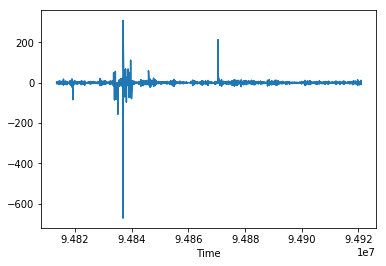

In [127]:
(postfitRes.loc['IonoFreeL_1P_2P']['PF Residual (m)']*1000).plot()
plt.show()

In [143]:
residual = postfitRes.loc['IonoFreeL_1P_2P']['PF Residual (m)']
residual

Time
94813500    0.004377
94813500   -0.002319
94813500   -0.004542
94813500   -0.000065
94813500    0.002820
94813500   -0.000266
94813800   -0.001504
94813800    0.000891
94813800    0.002521
94813800    0.000514
94813800   -0.002030
94813800   -0.000516
94814100    0.002289
94814100   -0.001726
94814100    0.005827
94814100    0.004159
94814100   -0.007148
94814100    0.000163
94814100   -0.003626
94814400   -0.002829
94814400    0.002586
94814400    0.007535
94814400    0.002254
94814400   -0.006915
94814400   -0.000381
94814400   -0.002264
94814700   -0.004999
94814700    0.004816
94814700    0.007369
94814700    0.000856
              ...   
94920000    0.007390
94920000    0.000756
94920000   -0.006139
94920000   -0.001683
94920000    0.007350
94920000    0.005833
94920000   -0.007895
94920000   -0.005459
94920300    0.002880
94920300    0.002434
94920300   -0.000085
94920300    0.000337
94920300    0.004033
94920300    0.004420
94920300   -0.009605
94920300   -0.004551
94920600

In [147]:
(((residual**2).sum())/residual.count())**0.5 * 1000

20.638064015402698

In [145]:
residual.mean()

/home/bogdanm/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [122]:
(((residual)**2).sum()/residual.count())**0.5

20.638064015402694

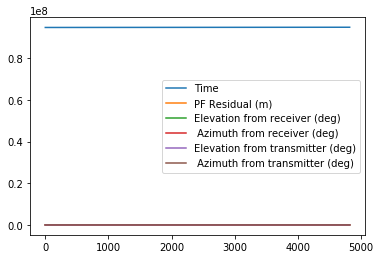

In [22]:
postfitRes.plot()
plt.show()

In [20]:
import matplotlib.pyplot as plt